In [59]:
pip install citipy

Note: you may need to restart the kernel to use updated packages.


In [60]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import requests
import time
import json
import scipy.stats as st

#import api key from configs.py file
from configs import api_key

#city data based on lat. and long.
from citipy import citipy

#output file (csv)
output_data_file = "output_data/cities.csv"

#Range of latitudes and logitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [61]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

#np.random.seed(1)
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

614

In [62]:
#set up dataframe and create empty columns for the data to be entered into
cities_df = pd.DataFrame({"City": cities})
cities_df["Lat"] = ""
cities_df["Lng"] = ""
cities_df["Max Temp"] = ""
cities_df["Humidity"] = ""
cities_df["Cloudiness"] = ""
cities_df["Wind Speed"] = ""
cities_df["Country"] = ""
cities_df["Date"] = ""

#base url ready for the city name to be added to the end
base_url = f'http://api.openweathermap.org/data/2.5/weather?appid={api_key}&q='

#starting data retrieval
print("Beginning Data Retrieval")
print("-----------------------------")
#go through cities_df by city name and start entering in the info from the API
for index, row in cities_df.iterrows():
    #get city from df 
    city_name = row["City"]
    #assemble url and make api call
    response = requests.get(base_url + city_name).json()
    
    #try to fill in the df, else print skipping
    try:
        cities_df.loc[index, 'Lat'] = response['coord']['lat']
        cities_df.loc[index, 'Lng'] = response['coord']['lon']
        cities_df.loc[index, 'Max Temp'] = response['main']['temp_max']
        cities_df.loc[index, 'Humidity'] = response['main']['humidity']
        cities_df.loc[index, 'Cloudiness'] = response['clouds']['all']
        cities_df.loc[index, 'Wind Speed'] = response['wind']['speed']
        cities_df.loc[index, 'Country'] = response['sys']['country']
        cities_df.loc[index, 'Date'] = response['dt']
        print(f'Processing record {index} | {city_name}')
    except (KeyError, IndexError):
        print("City not found. Skipping...")
        #delete that row from df
        cities_df = cities_df.drop([index])

print("-----------------------------")        
print("Data Retrieval Complete")
print("-----------------------------")

#convert Max temp from Kelvin to Fahrenheit and Wind Speed from m/s to mph
cities_df["Max Temp"] = cities_df["Max Temp"] * 1.8 - 459.67
cities_df["Wind Speed"] = cities_df["Wind Speed"] / 0.44704

#delete rows with NAs
cities_df = cities_df.dropna()

Beginning Data Retrieval
-----------------------------
Processing record 0 | rikitea
Processing record 1 | olafsvik
Processing record 2 | carnarvon
Processing record 3 | iqaluit
Processing record 4 | santo augusto
Processing record 5 | vardo
Processing record 6 | nome
Processing record 7 | avarua
Processing record 8 | xining
Processing record 9 | sao joao da barra
Processing record 10 | swan hill
Processing record 11 | yellowknife
Processing record 12 | new norfolk
Processing record 13 | albany
Processing record 14 | meulaboh
Processing record 15 | punta arenas
City not found. Skipping...
Processing record 17 | barrow
Processing record 18 | abu kamal
Processing record 19 | ust-tsilma
Processing record 20 | severo-kurilsk
Processing record 21 | cape town
Processing record 22 | busselton
Processing record 23 | sabang
City not found. Skipping...
Processing record 25 | hobart
Processing record 26 | kaitangata
Processing record 27 | mataura
Processing record 28 | ushuaia
Processing record 2

Processing record 254 | nguru
City not found. Skipping...
Processing record 256 | ormond beach
Processing record 257 | chimoio
Processing record 258 | vila franca do campo
Processing record 259 | kharp
Processing record 260 | vao
Processing record 261 | shakawe
Processing record 262 | vila velha
Processing record 263 | ulaangom
Processing record 264 | izumo
City not found. Skipping...
Processing record 266 | metro
Processing record 267 | boffa
Processing record 268 | kruisfontein
Processing record 269 | sapiranga
Processing record 270 | fallon
Processing record 271 | saint-augustin
City not found. Skipping...
Processing record 273 | chapais
City not found. Skipping...
Processing record 275 | maragogi
Processing record 276 | sinnamary
Processing record 277 | quime
Processing record 278 | tuscaloosa
Processing record 279 | adrar
Processing record 280 | alofi
Processing record 281 | atar
Processing record 282 | viedma
Processing record 283 | port macquarie
Processing record 284 | labuhan


Processing record 506 | miranda
Processing record 507 | balikpapan
Processing record 508 | fartura
Processing record 509 | konya
Processing record 510 | behbahan
City not found. Skipping...
Processing record 512 | solnechnyy
Processing record 513 | saint-pierre
Processing record 514 | jumla
Processing record 515 | bonavista
City not found. Skipping...
Processing record 517 | ejido
Processing record 518 | potchefstroom
Processing record 519 | carballo
Processing record 520 | kloulklubed
Processing record 521 | altamira
Processing record 522 | zhangjiakou
Processing record 523 | carutapera
Processing record 524 | karonga
Processing record 525 | palana
Processing record 526 | illapel
Processing record 527 | mehamn
Processing record 528 | ryotsu
Processing record 529 | taraz
Processing record 530 | nizhniy kuranakh
Processing record 531 | avera
Processing record 532 | tondano
Processing record 533 | sao joao da ponte
Processing record 534 | bayan
Processing record 535 | goderich
Processing

In [63]:
#export data to csv
cities_df.to_csv('../output_data/cities_df.csv')

#display number of values for each column in df
cities_df.count()

City          0
Lat           0
Lng           0
Max Temp      0
Humidity      0
Cloudiness    0
Wind Speed    0
Country       0
Date          0
dtype: int64

In [64]:
#display the dataframe
cities_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,70.268,52,100,8.18719,PF,1593015836
1,olafsvik,64.89,-23.71,52.808,75,82,9.86489,IS,1593015867
2,carnarvon,-24.87,113.63,57.2,93,0,8.05297,AU,1593015847
3,iqaluit,63.75,-68.51,42.8,87,75,4.69757,CA,1593015852
4,santo augusto,-27.85,-53.78,73.382,60,6,16.956,BR,1593016069


In [65]:
#inspect df and determine number of cities with over 100% humidity 
low_humidity_df = cities_df[cities_df.Humidity <= 100]
print(f'The number of cities with over 100% humidity is {len(cities_df) - len(low_humidity_df)}.')

The number of cities with over 100% humidity is 0.


In [66]:
#  Get the indices of cities that have humidity over 100%.
over_100_indexes = cities_df[cities_df.Humidity > 100].index
over_100_indexes

Int64Index([], dtype='int64')

In [67]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data= cities_df
for x in over_100_indexes:
    clean_city_data = cities_df.drop([x])

clean_city_data.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,rikitea,-23.12,-134.97,70.268,52,100,8.18719,PF,1593015836
1,olafsvik,64.89,-23.71,52.808,75,82,9.86489,IS,1593015867
2,carnarvon,-24.87,113.63,57.2,93,0,8.05297,AU,1593015847
3,iqaluit,63.75,-68.51,42.8,87,75,4.69757,CA,1593015852
4,santo augusto,-27.85,-53.78,73.382,60,6,16.956,BR,1593016069


In [86]:
# Extract relevant fields from the data frame
lat = clean_city_data.Lat
max_temp = clean_city_data["Max Temp"]
humid = clean_city_data.Humidity
cloud = clean_city_data.Cloudiness
wind = clean_city_data['Wind Speed']

# Export the City_Data into a csv
clean_city_data.to_csv('../output_data/clean_city_data.csv', index = False)

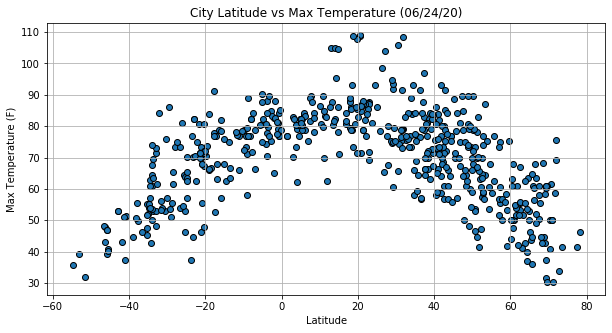

In [69]:
#Latitude vs Temperature Plot

#save today's date in the today variable
today = pd.to_datetime('today').strftime("%m/%d/%y")
fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, max_temp, edgecolors = "black")
plt.title(f'City Latitude vs Max Temperature ({today})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#saving figure in the output_data directory
fig.savefig('../output_data/lati_vs_temp.png')
plt.show()

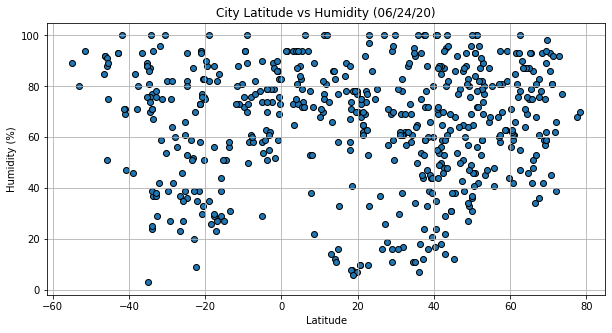

In [70]:
#Latitude vs Humidity Plot

fig = plt.figure(figsize = (10,5))

#call scatter plot
plt.scatter(lat, humid, edgecolors = "black")
plt.title(f'City Latitude vs Humidity ({today})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#saving figure to the output_data directory
fig.savefig('../output_data/lat_vs_humid.png')
plt.show()

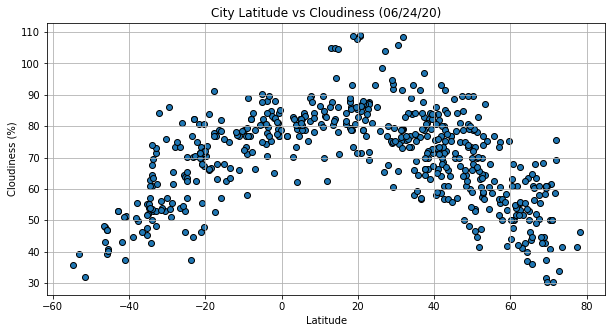

In [71]:
#Latitude vs Cloudiness Plot

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, max_temp, edgecolors = "black")
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#saving file to the output_data directory
fig.savefig('../output_data/lat_vs_cloudiness.png')
plt.show()

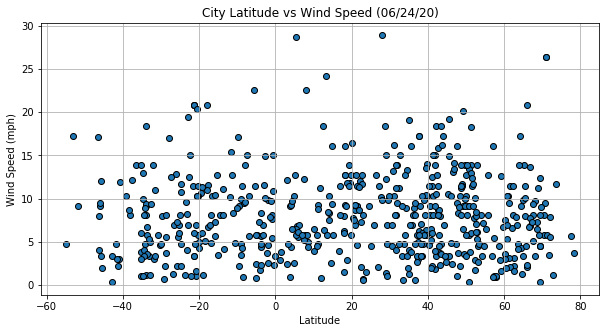

In [72]:
#Latitude vs Wind Speed Plot

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, wind, edgecolors = "black")
plt.title(f'City Latitude vs Wind Speed ({today})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#saving plot to the output_data directory
fig.savefig('../output_data/lat_vs_wind_speed.png')
plt.show()

In [73]:
# OPTIONAL: Create a function to create Linear Regression plots

#input is 2 lists and returns regress_values, the line equation of best fit, and the r correlation
def lin_regress(list_x, list_y):
    slope, int, r, p, st_err = st.linregress(list_x, list_y)
    regress_values = slope*list_x + int
    line_eq = f'y = {round(slope, 2)}x + {round(int,2)}'
    return regress_values, line_eq, r

In [74]:
# Create Northern and Southern Hemisphere DataFrames

north_hem = clean_city_data[clean_city_data["Lat"] >= 0]
south_hem = clean_city_data[clean_city_data["Lat"] < 0]

# All Northern Hemisphere Plots

In [75]:
#Preparing data for all the northern hemisphere plots

lat = north_hem.Lat.astype(float)
max_temp = north_hem["Max Temp"].astype(float)
humid = north_hem.Humidity.astype(float)
cloud = north_hem.Cloudiness.astype(float)
wind = north_hem['Wind Speed'].astype(float)

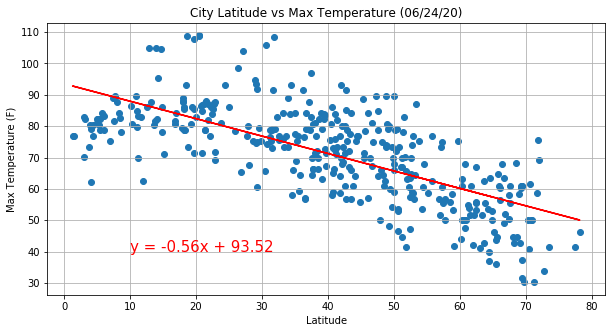

The r-squared is: 0.48903330903904413


In [76]:
#Northern Hemisphere - Max Temp vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, max_temp)

fig = plt.figure(figsize = (10,5))

#calling the scatter plot
plt.scatter(lat, max_temp)
plt.title(f'City Latitude vs Max Temperature ({today})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (10,40), fontsize = 15, color = "red" )

#saves the file to the output_data directory
fig.savefig('../output_data/north_lat_vs_temp.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

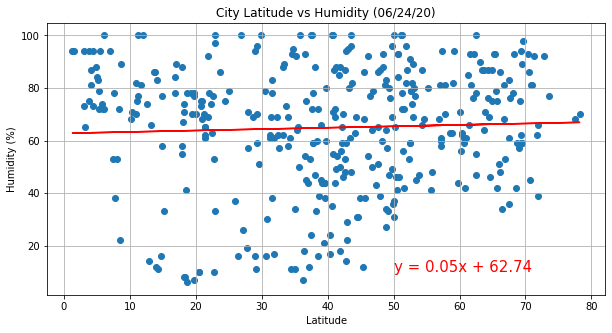

The r-squared is: 0.0018527320855520227


In [77]:
#Northern Hemisphere - Humidity (%) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, humid)

fig = plt.figure(figsize = (10,5))

#call scatter plot
plt.scatter(lat, humid)
plt.title(f'City Latitude vs Humidity ({today})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (50,10), fontsize = 15, color = "red" )

#saving figure to the output_data directory
fig.savefig('../output_data/north_lat_vs_humid.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

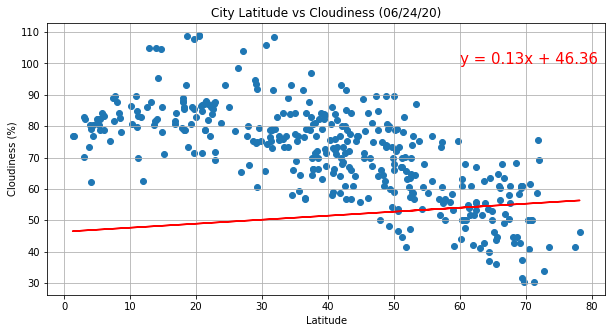

The r-squared is: 0.004357521800121019


In [78]:
#Northern Hemisphere - Cloudiness (%) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, cloud)

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, max_temp)
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (60,100), fontsize = 15, color = "red" )

#saving file to the output_data directory
fig.savefig('../output_data/north_lat_vs_cloudiness.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

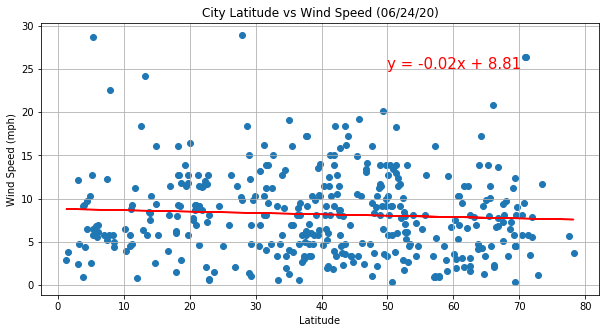

The r-squared is: 0.003713248638999096


In [79]:
#Northern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, wind)

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, wind)
plt.title(f'City Latitude vs Wind Speed ({today})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (50,25), fontsize = 15, color = "red" )

#saving plot to the output_data directory
fig.savefig('../output_data/north_lat_vs_wind_speed.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

# All Southern Hemisphere Plots

In [80]:
#Preparing data for all the northern hemisphere plots

lat = south_hem.Lat.astype(float)
max_temp = south_hem["Max Temp"].astype(float)
humid = south_hem.Humidity.astype(float)
cloud = south_hem.Cloudiness.astype(float)
wind = south_hem['Wind Speed'].astype(float)

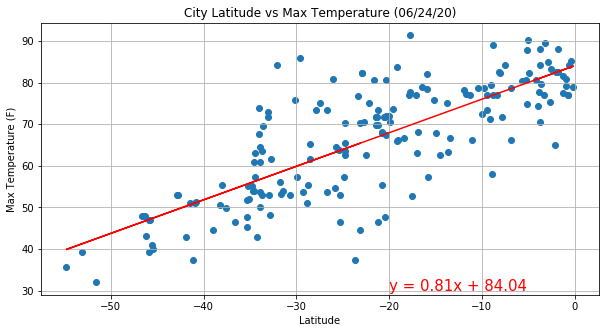

The r-squared is: 0.6098400241575889


In [81]:
#Southern Hemisphere - Max Temp vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, max_temp)

fig = plt.figure(figsize = (10,5))

#calling the scatter plot
plt.scatter(lat, max_temp)
plt.title(f'City Latitude vs Max Temperature ({today})')
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (-20,30), fontsize = 15, color = "red" )

#saves the file to the output_data directory
fig.savefig('../output_data/south_lat_vs_temp.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

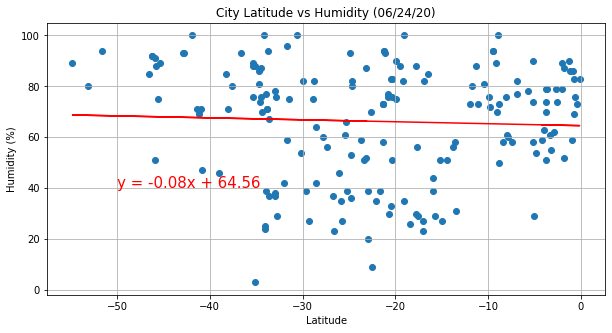

The r-squared is: 0.002152582403747114


In [82]:
#Southern Hemisphere - Humidity (%) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, humid)

fig = plt.figure(figsize = (10,5))

#call scatter plot
plt.scatter(lat, humid)
plt.title(f'City Latitude vs Humidity ({today})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (-50,40), fontsize = 15, color = "red" )

#saving figure to the output_data directory
fig.savefig('../output_data/south_lat_vs_humid.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

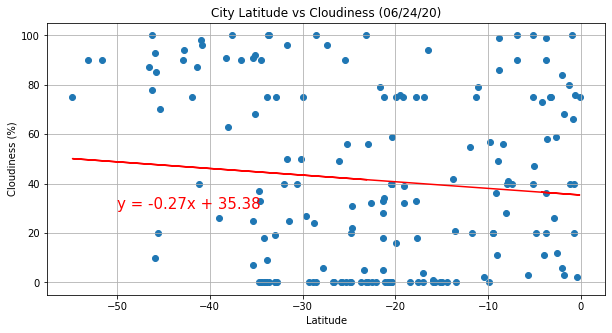

The r-squared is: 0.010200426345229639


In [83]:
#Southern Hemisphere - Cloudiness (%) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, cloud)

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, cloud)
plt.title(f'City Latitude vs Cloudiness ({today})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (-50,30), fontsize = 15, color = "red" )

#saving file to the output_data directory
fig.savefig('../output_data/south_lat_vs_cloudiness.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')

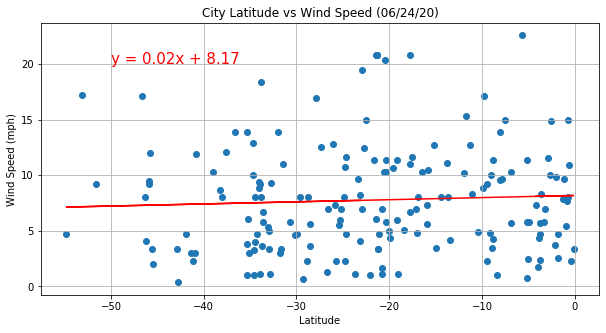

The r-squared is: 0.002795634432201731


In [84]:
#Southern Hemisphere - Wind Speed (mph) vs Latitude Linear Regression

#calling the linear regression function and saving the 3 outputs(regress_values, line_eq, and r) to the regress variable
regress = lin_regress(lat, wind)

fig = plt.figure(figsize = (10,5))

#calling scatter plot
plt.scatter(lat, wind)
plt.title(f'City Latitude vs Wind Speed ({today})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()

#plots the linear regression line
plt.plot(lat, regress[0], color = "red")
#adds the linear regression equation to the plot
plt.annotate(regress[1], (-50,20), fontsize = 15, color = "red" )

#saving plot to the output_data directory
fig.savefig('../output_data/south_lat_vs_wind_speed.png')
plt.show()

#prints the r-squared value
print(f'The r-squared is: {pow(regress[2], 2)}')